## 1. Aplicaciones y reseñas de Google Play Store

<p><b>Aclaración:</b> El contenido de esta <em>notebook</em> es de autoría y ha sido diseñado por <a href="https://www.linkedin.com/in/lgupta18/">Lavanya Gupta</a> - Ingeniera de Software de profesión con intereses de investigación en ciencia de datos, aprendizaje automático y aprendizaje profundo. Ella tiene una rica experiencia en los principales proyectos de producción basados ​​en datos en la industria. Ella es una programadora apasionada en Python, ¡y le encanta experimentar con nuevos conjuntos de datos que ella misma crea!</p>

<p> Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden ser lucrativas. Debido a estos dos factores, se están desarrollando más y más aplicaciones. En este cuaderno, haremos un análisis exhaustivo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información en los datos para diseñar estrategias para impulsar el crecimiento y la retención. </p>

<ul>
<li> <code> APPS.csv </code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 características que describen una aplicación determinada. </li>
<li> <code> RESENAS_USUARIOS.csv </code>: contiene 100 reseñas para cada aplicación, <a href = "https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/"> más útil primero </a>. El texto de cada revisión ha sido preprocesado y se le atribuyen tres características nuevas: Sentimiento (Positivo, Negativo o Neutral), Polaridad del sentimiento y Subjetividad del sentimiento. </li>
</ul>

In [1]:
# leer los datasets
import pandas as pd
apps_con_duplicados = pd.read_csv('DATASETS/APPS.csv')
print('\n')

# Eliminar duplicados
apps = apps_con_duplicados.drop_duplicates()
print(apps.head())
print('\n')

# Imprimir el número total de apps
napps = apps['App'].nunique()
print('El número total de apps en el dataset = ', napps)
print('\n')

# Imprimir un resumen conciso del dataframe apps
print(apps.info())



   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play 

In [2]:
# Mostrar una muestra aleatoria de n filas
n = 5
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2617,3346,ZERO Lock Screen,TOOLS,3.5,75336,0.5,"1,000,000+",Free,0,Everyone,Tools,"February 5, 2016",1.3,4.0 and up
2812,3568,Unclouded - Cloud Manager,PRODUCTIVITY,4.1,6850,11.0,"100,000+",Free,0,Everyone,Productivity,"August 8, 2016",2.3.3-play,4.1 and up
1470,1813,Cooking Madness - A Chef's Restaurant Games,GAME,4.7,358817,49.0,"10,000,000+",Free,0,Everyone,Arcade,"July 30, 2018",1.2.2,4.1 and up
3761,4678,Sin City Crime Simulator V - Gangster,GAME,4.2,2113,67.0,"100,000+",Free,0,Everyone 10+,Action,"April 23, 2018",Varies with device,4.0.3 and up
4682,5663,Learners Test Free: AU Driver Knowledge Test (...,FAMILY,3.9,623,8.5,"100,000+",Free,0,Everyone,Education,"March 26, 2018",3.5,4.1 and up


## 2. Limpieza de datos

<p> Las cuatro características con las que trabajaremos con mayor frecuencia en adelante son <code>Installs</code> (Instalaciones), <code>Size</code> (Tamaño), <code>Rating</code> (Puntaje) y <code>Precio</code> (Precio). El método <code>.info()</code> (de la tarea anterior) nos dijo que las columnas <code>Installs</code> y <code>Price</code> son de tipo <code>object</code> y no <code>int64</code> (entero) o <code>float64</code> (decimal) como cabría esperar. Esto se debe a que la columna contiene algunos caracteres más que solo dígitos [0,9].</p>
<p>Idealmente, nos gustaría que estas columnas sean numéricas como su nombre lo sugiere.</p><br>
<p>Por lo tanto, ahora procedemos a la limpieza y preparamos nuestros datos para ser consumidos en nuestros análisis más adelante. Específicamente, la presencia de caracteres especiales (<code>, $ +</code>) en las columnas <code>Installs</code> y <code>Price</code> dificulta su conversión a un tipo de datos numérico.


In [3]:
# Lista de caracteres a remover
car_a_remover = ["+",",","$"]

# Lista de nombres de columnas a limpiar
col_a_limpiar = ["Installs", "Price"]

# Bucle por cada colúmna
for col in col_a_limpiar:
    # Reemplazar cada caracter con una cadena vacía
    for car in car_a_remover:
        apps[col] = apps[col].astype(str).str.replace(car,'')
    # Convertir la columna a numérica
    apps[col] = pd.to_numeric(apps[col])

In [4]:
display(apps.sample(5))

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2983,3742,"Breaking News, Local news, Attacks and Alerts ...",NEWS_AND_MAGAZINES,4.7,2543,6.3,500000,Free,0.0,Everyone,News & Magazines,"July 19, 2018",8.0.6,4.1 and up
4407,5363,I Am Innocent,GAME,4.4,208501,56.0,1000000,Free,0.0,Teen,Adventure,"July 23, 2018",2.8.307,4.0.3 and up
2123,2696,Wemep - Special price representative (special ...,SHOPPING,4.5,178497,9.1,10000000,Free,0.0,Everyone,Shopping,"August 2, 2018",4.33.0,4.0.3 and up
4532,5496,Undead Assault,GAME,4.3,4704,37.0,100000,Free,0.0,Everyone 10+,Arcade,"November 4, 2015",1.4.6,2.3 and up
5786,6817,BU Dental GoGoldman,TRAVEL_AND_LOCAL,NaN,0,18.0,100,Free,0.0,Everyone,Travel & Local,"September 1, 2017",1.2,4.4 and up


## 3. Explorar categorías de app

<p> Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para generar audiencia global. Para que las empresas tengan sus aplicaciones frente a los usuarios, es importante hacer que sean más rápidas y fáciles de descubrir en Google Play. Para mejorar la experiencia general de búsqueda, Google ha introducido el concepto de agrupar aplicaciones en categorías. </p>
<p> Esto nos trae a la siguientes preguntas:</p>
<ul>
    <li>¿Qué categoría tiene la mayor proporción de aplicaciones (activas) en el mercado?</li>
    <li>¿Existe alguna categoría específica dominando en el mercado?</li>
    <li>¿Qué categorías tienen el menor número de aplicaciones</li>
</ul>
<p>Veremos que hay <code>33</code> categorías únicas de aplicaciones presentes en nuestro conjunto de datos. Las aplicaciones de <code>Family</code> (Familia) y <code>Game</code> (Juegos) tienen la prevalencia más alta del mercado. Interesantemente, las categorías de <code>Tools</code> (Herramientas), <code>Business</code> (Negocios) y <code>Medical</code> (Médicas) están también en la cima.

In [14]:
# Importar plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Imprimir el número total de categorías únicas
num_categorias = len(apps['Category'].unique())
print('Número de categorías =', num_categorias)

# Contar el número de aplicaciones en cada categoría y ordenarlas en orden descendente
num_apps_en_categoria = apps['Category'].value_counts().sort_values(ascending=False)

datos = [go.Bar(
         x = num_apps_en_categoria.index, # index = nombre de categoría
         y = num_apps_en_categoria.values # value = count
    
)]

plotly.offline.iplot(datos)

Número de categorías = 33


## 4. Distribución del puntaje de las apps

<p>Después de haber presenciado la cuota de mercado para cada categoría de aplicaciones, veamos cómo funcionan todas estas aplicaciones en promedio. Las clasificaciones de aplicaciones (en una escala de 1 a 5) afectan la capacidad de detección, la conversión de aplicaciones y la imagen general de la marca de la compañía. Las clasificaciones son un indicador clave de rendimiento de una aplicación.</p>

In [16]:
# Calificaciones promedio de las apps
calif_promedio_app = apps['Rating'].mean()
print('Calificación promedio de las app = ', calif_promedio_app)

# Distribución de las apps de acuerdo a su calificación
datos = [go.Histogram(
         x = apps['Rating']
)]

# Línea discontinua vertical para indicar el promedio
diseno = {'shapes': [{
            'type':'line',
            'x0': calif_promedio_app,
            'y0': 0,
            'x1': calif_promedio_app,
            'y1': 1000,
            'line': {'dash': 'dashdot'}
         }]
         }

plotly.offline.iplot({'data':datos, 'layout': diseno})

Calificación promedio de las app =  4.173243045387998


<p>De nuestra investigación, encontramos que el volumen promedio de calificaciones en todas las categorías de aplicaciones es <code>4.17</code>. El diagrama del histograma está sesgado a la izquierda, lo que indica que la mayoría de las aplicaciones están altamente calificadas, con solo unas pocas excepciones en las aplicaciones de baja calificación.</p>

## 5. Tamaño y precio de una app

<p>Ahora examinemos el tamaño y el precio de la aplicación. Para el tamaño, si la aplicación móvil es demasiado grande, puede ser difícil y/o costoso para los usuarios descargarla. Los largos tiempos de descarga pueden apagar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad finita de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o de bajo costo. Estos problemas se agravan si el mundo en desarrollo es parte de su mercado objetivo; especialmente debido a las velocidades de internet, el poder adquisitivo y las tasas de cambio.</p>

<p>¿Cómo podemos idear estrategias para dimensionar y poner precio a nuestra aplicación?</p>
<ul>
    <li>¿El tamaño de una aplicación afecta su calificación? </li>
    <li>¿Los usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones livianas?</li>
    <li>¿El precio de una aplicación afecta su calificación?</li>
    <li>¿Los usuarios siempre prefieren aplicaciones gratuitas a aplicaciones pagas?</li>
</ul>

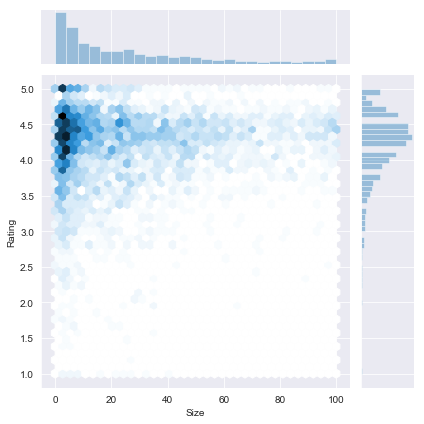

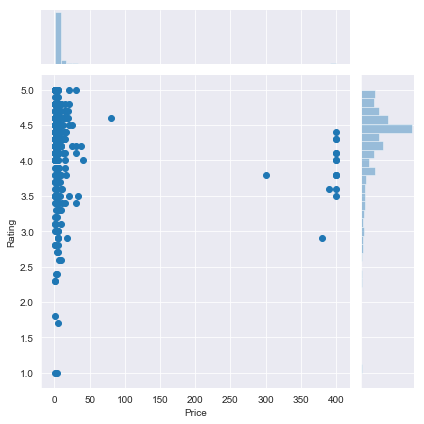

In [19]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Filtrar las filas donde los valores Rating (Calificación) y Size (Tamaño) no sean nulos
apps_con_tam_y_calif_presente = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subdivide para categorías con al menos 250 apps
categorias_grandes = apps_con_tam_y_calif_presente.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Grafica tamaño vs. calificación
plt1 = sns.jointplot(x=categorias_grandes['Size'], y=categorias_grandes['Rating'], kind='hex')

# Subdivide las apps cuyo 'Type' (tipo) es 'Paid' (Pago)
apps_pagas = apps_con_tam_y_calif_presente[apps_con_tam_y_calif_presente['Type'] == 'Paid']

# Grafica precio vs. calificación
plt1 = sns.jointplot(x=apps_pagas['Price'], y=apps_pagas['Rating'])

<p>Encontramos que la mayoría de las aplicaciones mejor calificadas (calificación mayor a 4) varían de 2 MB a 20 MB. También encontramos que la gran mayoría de las aplicaciones cuestan menos de $ 10.</p>

## 6. Relación entre la categoría y el precio de la app

<p>Entonces ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores deben llegar a fin de mes? ¿Qué estrategias de monetización pueden usar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan principalmente en las características, la complejidad y la plataforma.</p>

<p>Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para su aplicación móvil. Es importante tener en cuenta la disposición de su cliente a pagar por su aplicación. Un precio incorrecto podría romper el trato incluso antes de que ocurra la descarga. Los clientes potenciales podrían verse afectados por lo que perciben como un costo sorprendente, o podrían eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor de su dinero.</p>

<p>Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicación de calculadora, probablemente deberían mantenerse libres. Sin embargo, tendría sentido cobrar por una aplicación médica altamente especializada que diagnostica a pacientes diabéticos. A continuación, vemos que las aplicaciones <code>Medical</code> (Médicas) y <code>Family</code> (Familiares) son las más caras. ¡Algunas aplicaciones médicas se extienden incluso hasta \$ 80! Todas las aplicaciones de juegos tienen un precio razonable por debajo de \$ 20. </p>

Text(0.5, 1.0, 'Tendencia de precios de aplicaciones a través de categorías')

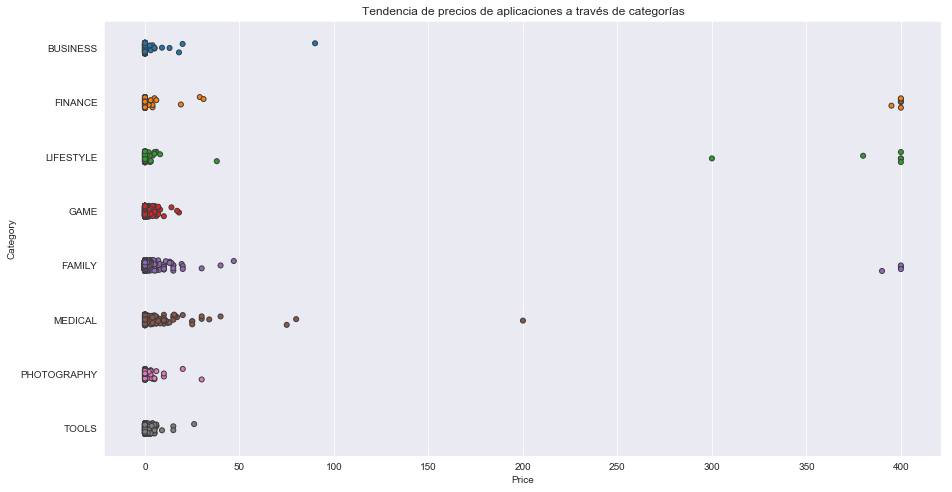

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Seleccionar algunas categorías populares de apps
pop_cats = ['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS','FINANCE', 'LIFESTYLE', 'BUSINESS']
cat_pop_apps = apps[apps['Category'].isin(pop_cats)]

# Examinar la tendencia de precios al graficar Precio vs Categoría
ax = sns.stripplot(x = cat_pop_apps['Price'], y = cat_pop_apps['Category'], jitter = True, linewidth = 1)
ax.set_title('Tendencia de precios de aplicaciones a través de categorías')

In [29]:
# Aplicaciones cuyo precio es mayor a 200
apps_sobre_200 = cat_pop_apps[['Category','App','Price']][cat_pop_apps['Price']>200]
apps_sobre_200

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


## 7. Dejar por fuera las 'Apps Chatarra'

<p> Parece que muchas de las aplicaciones realmente caras son aplicaciones "basura". Es decir, aplicaciones que realmente no tienen un propósito. Algunos desarrolladores de aplicaciones pueden crear una aplicación llamada <code>I Am Rich Premium</code> o <code>most expensive app (H)</code> solo por una broma o para probar sus habilidades de desarrollo de aplicaciones. Algunos desarrolladores incluso hacen esto con intenciones maliciosas e intentan ganar dinero esperando que la gente haga clic accidentalmente en comprar en su aplicación en la tienda.</p>
<p>Dejemos por fuera estas aplicaciones basura y volvamos a hacer nuestra visualización.</p>

Text(0.5, 1.0, 'Tendencia de precios de las aplicaciones a través de las categorías dejando por fuera las "Apps Chatarra"')

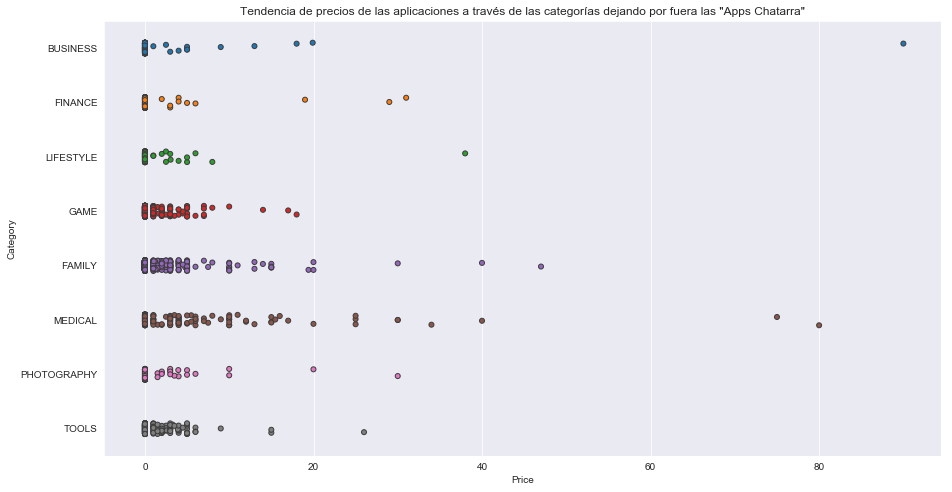

In [34]:
# Seleccionar las apps con precio menor a 100
apps_bajo_100 = cat_pop_apps[cat_pop_apps['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examinar precio vs. categoría con las apps más auténticas (apps_bajo_100)
ax = sns.stripplot(x = apps_bajo_100['Price'], y = apps_bajo_100['Category'], jitter = True, linewidth = 1)
ax.set_title('Tendencia de precios de las aplicaciones a través de las categorías dejando por fuera las "Apps Chatarra"')

## 8. Popularidad de las apps pagas vs. apps gratis

<p> Para las aplicaciones en Play Store hoy en día, existen cinco tipos de estrategias de precios: <em>free, freemium, paid, paymium y suscription</em>. Centrémonos solo en aplicaciones <em>free</em> (gratuitas) y <em>paid</em> (pagas). Algunas características de las aplicaciones gratuitas son:</p>
<ul>
    <li>Son gratis para descargar.</li>
    <li>La principal fuente de ingresos a menudo proviene de los anuncios.</li>
    <li>A menudo creada por compañías que tienen otros productos y la aplicación sirve como una extensión de esos productos.</li>
    <li>Puede servir como una herramienta para la retención de clientes, la comunicación y el servicio al cliente. </li>
</ul>
<p>Algunas características de las aplicaciones pagas son:</p>
<ul>
    <li>Se pide a los usuarios que paguen una vez por la aplicación para descargarla y usarla.</li>
    <li>El usuario realmente no puede tener una idea de la aplicación antes de comprarla.</li>
</ul>
<p>¿Las aplicaciones pagas se instalan tanto como las aplicaciones gratuitas? Resulta que las aplicaciones pagas tienen un número relativamente menor de instalaciones que las aplicaciones gratuitas, ¡aunque la diferencia no es tan marcada como hubiera esperado!</p>

In [37]:
trazo0 = go.Box(
    # Datos de aplicaciones pagas
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paga'
)

trazo1 = go.Box(
    # Datos de aplicaciones gratuitas
    y = apps[apps['Type'] =='Free']['Installs'],
    name = 'Gratuita'
)

diseno = go.Layout(
    title = 'Número de descargas de apps pagas vs. apps gratuitas',
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Añadir trazo0 y trazo1 a una lista para graficar
datos = [trazo0, trazo1]
plotly.offline.iplot({'data': datos, 'layout': diseno})

## 9. Análisis de sentimientos de las reseñas de los usuarios

<p>Minar los datos de reseñas de usuarios para determinar cómo se sienten las personas acerca de su producto, marca o servicio se pueden hacer utilizando una técnica llamada análisis de sentimientos. Las revisiones de los usuarios para las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral sobre esa aplicación. Por ejemplo, las palabras positivas en una revisión de la aplicación pueden incluir palabras como 'increíble', 'amigable', 'bueno', 'genial' y 'amor'. Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

In [40]:
# Cargar las reseñas de los usuarios
resenas_df = pd.read_csv('DATASETS/RESENAS_USUARIOS.csv')

# Mostrar las primeras filas del conjunto de datos
display(resenas_df.head())

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [41]:
# Unir dos dataframes
df_unido = pd.merge(apps, resenas_df, on='App', how='inner')

# Mostrar las primeras filas de los dataframes unidos
display(df_unido.head())

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [42]:
# Eliminar o soltar valores nulos para las columnas Sentiment (Sentimientos) y Translated_Review (Reseña traducida)
df_unido = df_unido.dropna(subset=['Sentiment', 'Translated_Review'])
display(df_unido.head())

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Text(0.5, 1.0, 'Distribución de la Polaridad del Sentimiento')

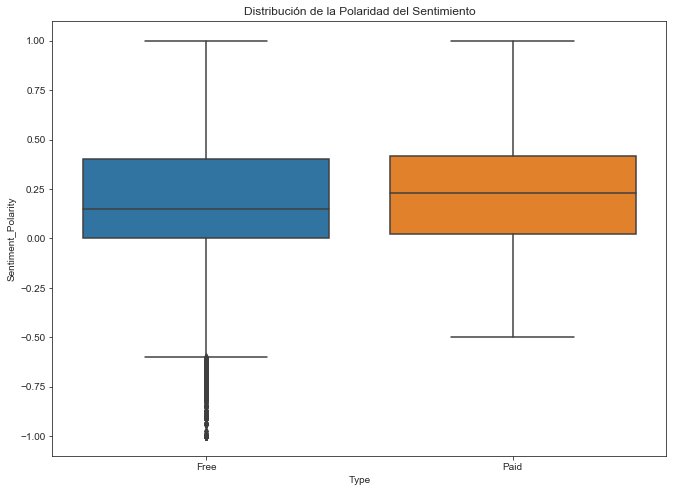

In [47]:
# Utilizar el modulo de seaborn
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11,8)

# Polaridad de sentimiento de los usuario para apps pagas vs. apps gratis
ax = sns.boxplot(x = df_unido['Type'], y = df_unido['Sentiment_Polarity'], data = df_unido)
ax.set_title('Distribución de la Polaridad del Sentimiento')

<p>Al graficar los puntajes de polaridad de las opiniones de los usuarios para las aplicaciones gratuitas y de pago, observamos que las aplicaciones gratuitas reciben muchos comentarios duros, como lo indican los valores atípicos en el eje y negativo. Las reseñas de aplicaciones pagas nunca parecen ser extremadamente negativas. Esto puede indicar algo sobre la calidad de la aplicación, es decir, las aplicaciones pagas son de mayor calidad que las aplicaciones gratuitas en promedio. El puntaje medio de polaridad para las aplicaciones pagas es un poco más alto que las aplicaciones gratuitas, por lo que se sincroniza con nuestra observación anterior.</p>
<p>En este <em>notebook</em>, analizamos más de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para informar nuestras decisiones si alguna vez deseamos crear una aplicación nosotros mismos. </p>